# Paramétrage de l'environnement de travail et import des packages

In [11]:
import sys
from pathlib import Path

In [12]:
ROOT = Path.cwd().parents[0]

RAW_DATA = ROOT / "01_data" / "01_raw"
PROCESSED_DATA = ROOT / "01_data" / "02_processed"

NOTEBOOK = ROOT / "02_notebooks"

FONCTIONS = ROOT / "03_fonctions"

%load_ext autoreload
%autoreload 2
sys.path.append(str(ROOT / "03_fonctions"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cheat_tools.data_manipulation import missing_percentage
from cheat_tools.data_visualization import plot_countplots_bivarie_grid, plot_boxplots_grid, plot_countplots_grid,afficher_heatmap_correlation, smart_countplot, plot_kde_multivariables_grid
from cheat_tools.stat_tests import analyser_dependance_khi2, analyser_dependance_mannwhitney
from cheat_tools.cartography import carte_interactive


# Global

**Informations globales sur le jeu de données**

In [14]:
data_housing = pd.read_csv(PROCESSED_DATA / "02_eda" / "housing_data_eda_processed.csv",
                           dtype={'id_annonce':"object"})


In [15]:
data_housing.head()

id_annonce code_insee  approximate_latitude  approximate_longitude   size  \
0      11541      01263             46.083952               4.762737  117.0   
1      09207      06004             43.587061               7.115609  185.0   
2      15840      76351             49.500023               0.137997   64.0   
3      03543      34147             43.470415               3.217742  107.0   
4      34900      24055             45.318143               0.600697  266.0   

   nb_rooms  nb_photos  population  nb_menages_fiscaux  revenu_median  ...  \
0       4.0        8.0      3792.0              1651.0        25970.0  ...   
1       3.0        6.0     75130.0             40649.0        24410.0  ...   
2       3.0        6.0    166058.0             77021.0        20180.0  ...   
3       5.0       10.0      3478.0              1422.0        21650.0  ...   
4       9.0        8.0       780.0               304.0        20560.0  ...   

   nb_lits_tourisme  densite_services_rayon  type_rural_urbain  \
0               0.0                    12.0             Urbain   
1            2958.0                   223.0             Urbain   
2            1719.0                   189.0             Urbain   
3               0.0                    18.0              Rural   
4               0.0                     3.0              Rural   

  position_commune_unite_urbaine property_type        type_degre_densite  \
0                       Banlieue        maison        Ceintures urbaines   
1                       Banlieue   appartement    Grands centres urbains   
2                         Centre   appartement    Grands centres urbains   
3                         Centre        maison             Bourgs ruraux   
4             Hors unité urbaine        maison  Rural à habitat dispersé   

                          type_unite_urbaine taille_pole_et_couronne  \
0         Agglomération inter-départementale  Hors Attraction Villes   
1         Agglomération intra-départementale        Aire 200k - 700k   
2         Agglomération intra-départementale        Aire 200k - 700k   
3         Agglomération intra-départementale         Aire 50k - 200k   
4  Commune hors unité urbaine du département  Hors Attraction Villes   

  taille_agglomeration target  
0        20k - 50k hab      0  
1        200k - 2M hab      0  
2        200k - 2M hab      0  
3          2k - 5k hab      0  
4   Rural / Hors Agglo      0  

[5 rows x 21 columns]

In [16]:
data_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26647 entries, 0 to 26646
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_annonce                      26647 non-null  object 
 1   code_insee                      26647 non-null  object 
 2   approximate_latitude            26647 non-null  float64
 3   approximate_longitude           26647 non-null  float64
 4   size                            26478 non-null  float64
 5   nb_rooms                        26505 non-null  float64
 6   nb_photos                       26647 non-null  float64
 7   population                      26445 non-null  float64
 8   nb_menages_fiscaux              26316 non-null  float64
 9   revenu_median                   26316 non-null  float64
 10  nb_actes_delinquants            26421 non-null  float64
 11  nb_lits_tourisme                26421 non-null  float64
 12  densite_services_rayon          

In [17]:
data_housing.describe()

approximate_latitude  approximate_longitude          size  \
count          26647.000000           26647.000000  26478.000000   
mean              46.560133               2.653711    124.748725   
std                2.358993               2.584023     70.909756   
min               41.374436              -4.718490     10.000000   
25%               43.896695               1.198593     72.000000   
50%               46.985814               2.385489    110.000000   
75%               48.844479               4.683550    185.000000   
max               51.046009               9.503198   1420.000000   

           nb_rooms     nb_photos     population  nb_menages_fiscaux  \
count  26505.000000  26647.000000   26445.000000        26316.000000   
mean       4.380117      8.470034   45363.082851        20417.412867   
std        2.212467      4.505727   81954.828111        36762.248374   
min        1.000000      1.000000      14.000000           41.000000   
25%        3.000000      5.000000    2613.000000         1200.750000   
50%        4.000000      8.000000   12096.000000         5562.000000   
75%        5.000000     10.000000   49104.000000        22023.000000   
max       27.000000     50.000000  504078.000000       222023.000000   

       revenu_median  nb_actes_delinquants  nb_lits_tourisme  \
count   26316.000000          26421.000000      26421.000000   
mean    24194.437604           3640.420423        612.053102   
std      5199.219277           7281.908925       1453.105525   
min     13460.000000              0.000000          0.000000   
25%     20970.000000             62.000000          0.000000   
50%     22870.000000            654.000000          0.000000   
75%     25810.000000           3482.000000        557.000000   
max     55340.000000          43378.000000      16734.000000   

       densite_services_rayon        target  
count            26647.000000  26647.000000  
mean               152.187188      0.346155  
std                256.370255      0.475752  
min                  0.000000      0.000000  
25%                 12.000000      0.000000  
50%                 47.000000      0.000000  
75%                164.000000      1.000000  
max               1524.000000      1.000000

In [18]:
missing_percentage(data_housing)

features     0
0                       id_annonce  0.00
1                       code_insee  0.00
2             approximate_latitude  0.00
3            approximate_longitude  0.00
4                             size  0.01
5                         nb_rooms  0.01
6                        nb_photos  0.00
7                       population  0.01
8               nb_menages_fiscaux  0.01
9                    revenu_median  0.01
10            nb_actes_delinquants  0.01
11                nb_lits_tourisme  0.01
12          densite_services_rayon  0.00
13               type_rural_urbain  0.01
14  position_commune_unite_urbaine  0.01
15                   property_type  0.00
16              type_degre_densite  0.01
17              type_unite_urbaine  0.01
18         taille_pole_et_couronne  0.01
19            taille_agglomeration  0.01
20                          target  0.00

# Analyse univariée

**Comptage des modalités pour la variable cible**

<Axes: xlabel='target', ylabel='count'>

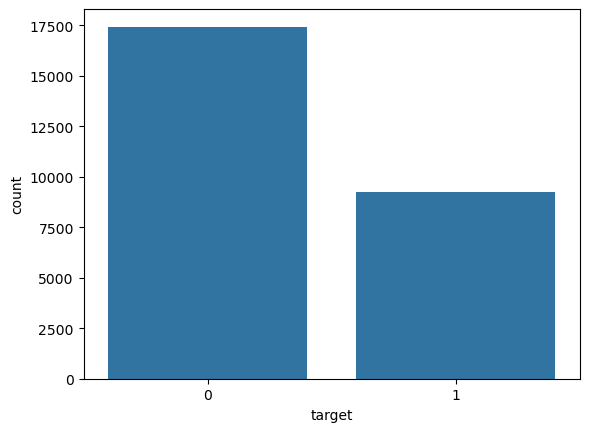

In [19]:
sns.countplot(data_housing,x="target")

**Comptage des modalités pour le type de propriété**

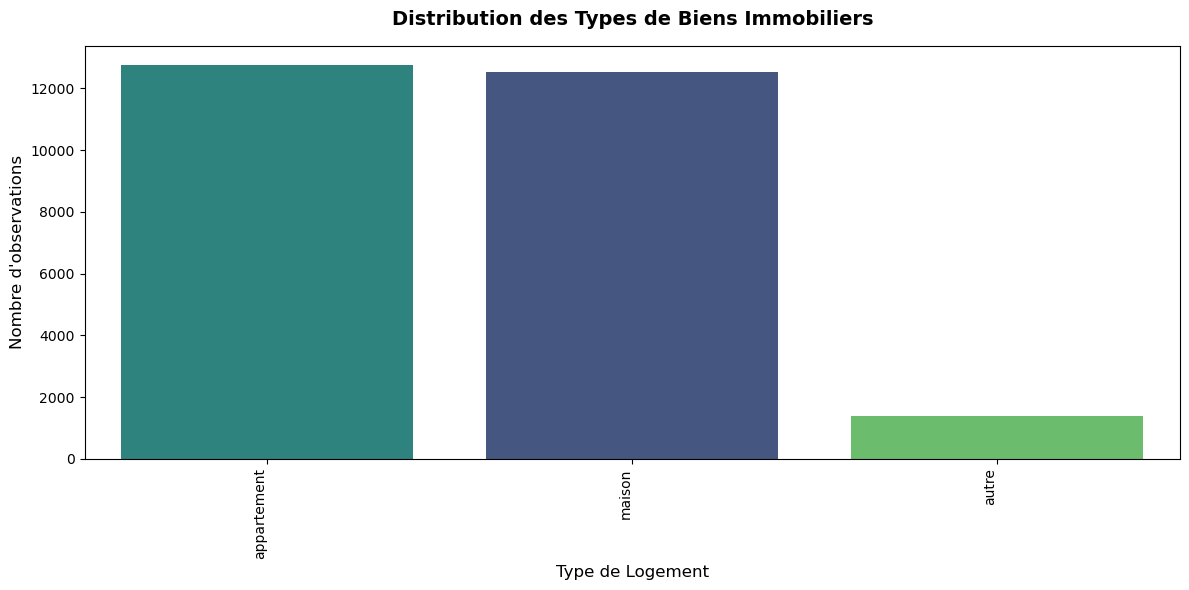

In [20]:
smart_countplot(
    data_housing, 
    "property_type", 
    titre="Distribution des Types de Biens Immobiliers", 
    xlabel="Type de Logement",
    rotation=90
    )

**Comptage des modalités pour les variables catégorielles**

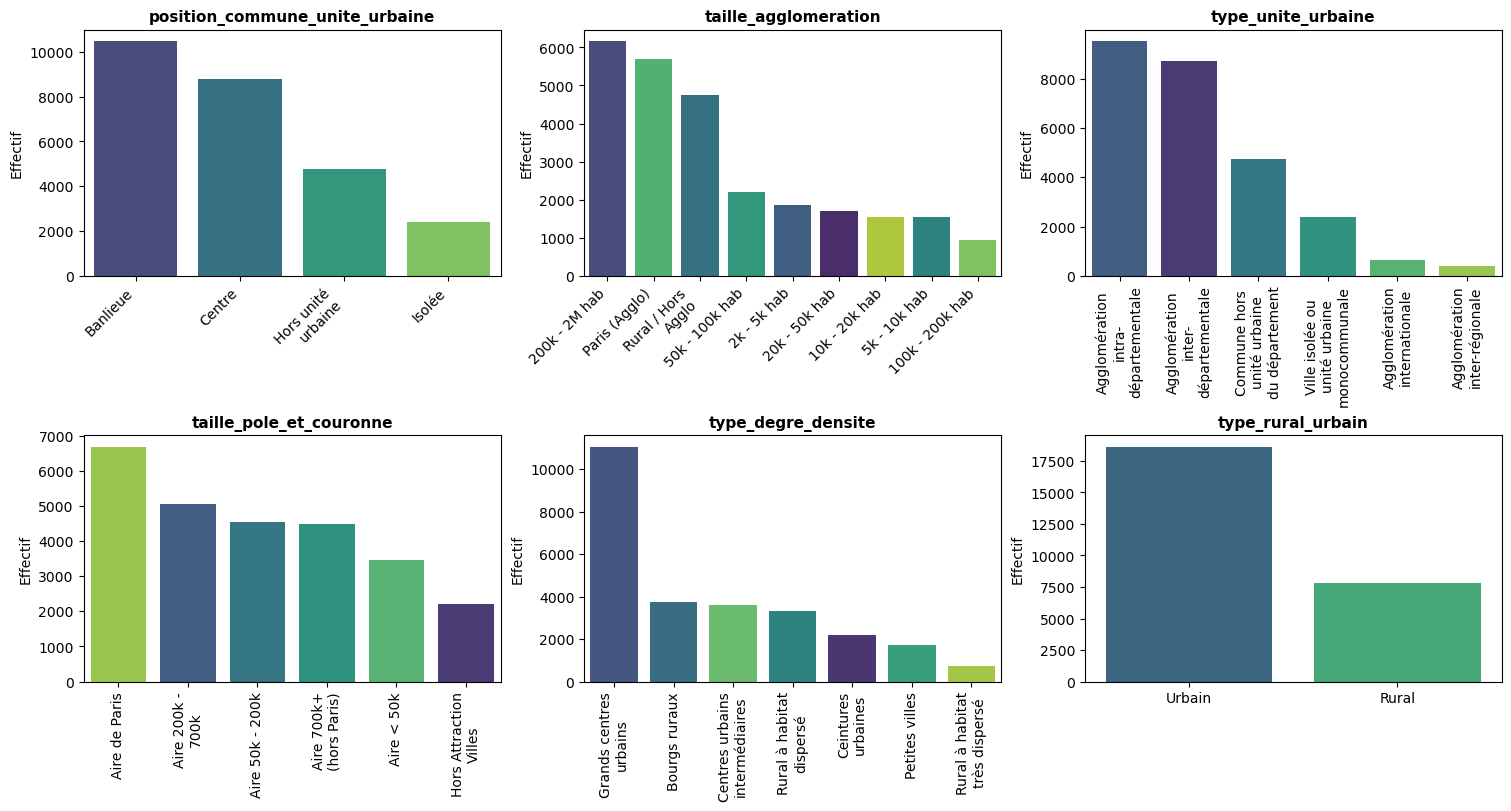

In [21]:
variables_interet = ["position_commune_unite_urbaine","taille_agglomeration","type_unite_urbaine",
                     "taille_pole_et_couronne","type_degre_densite","type_rural_urbain"]

plot_countplots_grid(
    data_housing,
    variables_interet
)

**Distributions pour les variables continues/ordinales d'interet**

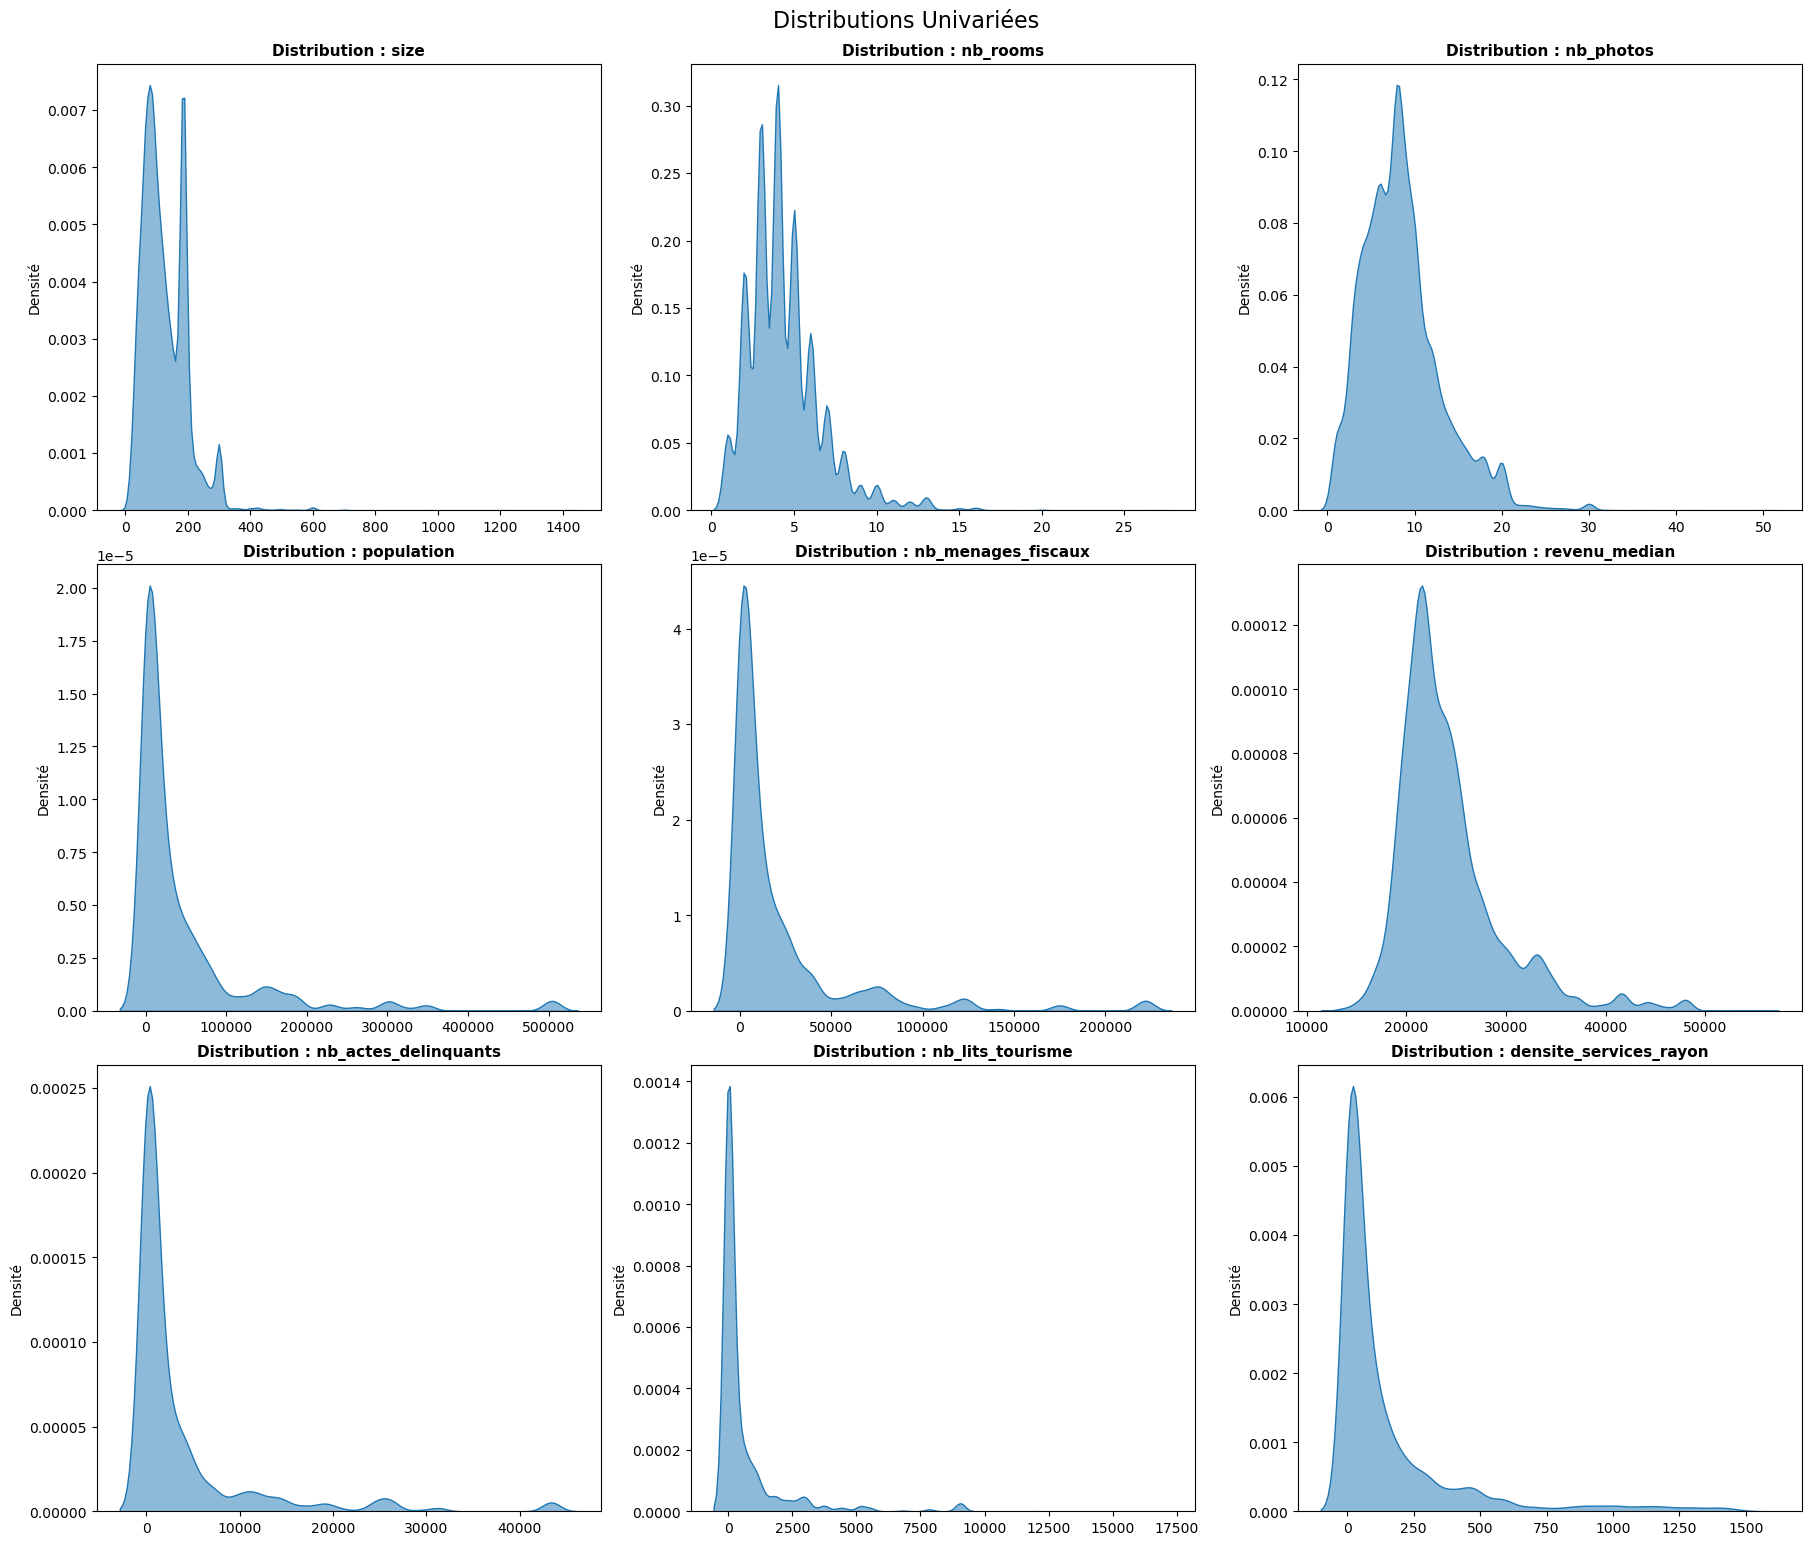

In [22]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon"]

plot_kde_multivariables_grid(
    data_housing,
    variables_interet
)

**Boites à moustaches pour les variables continues/ordinales**

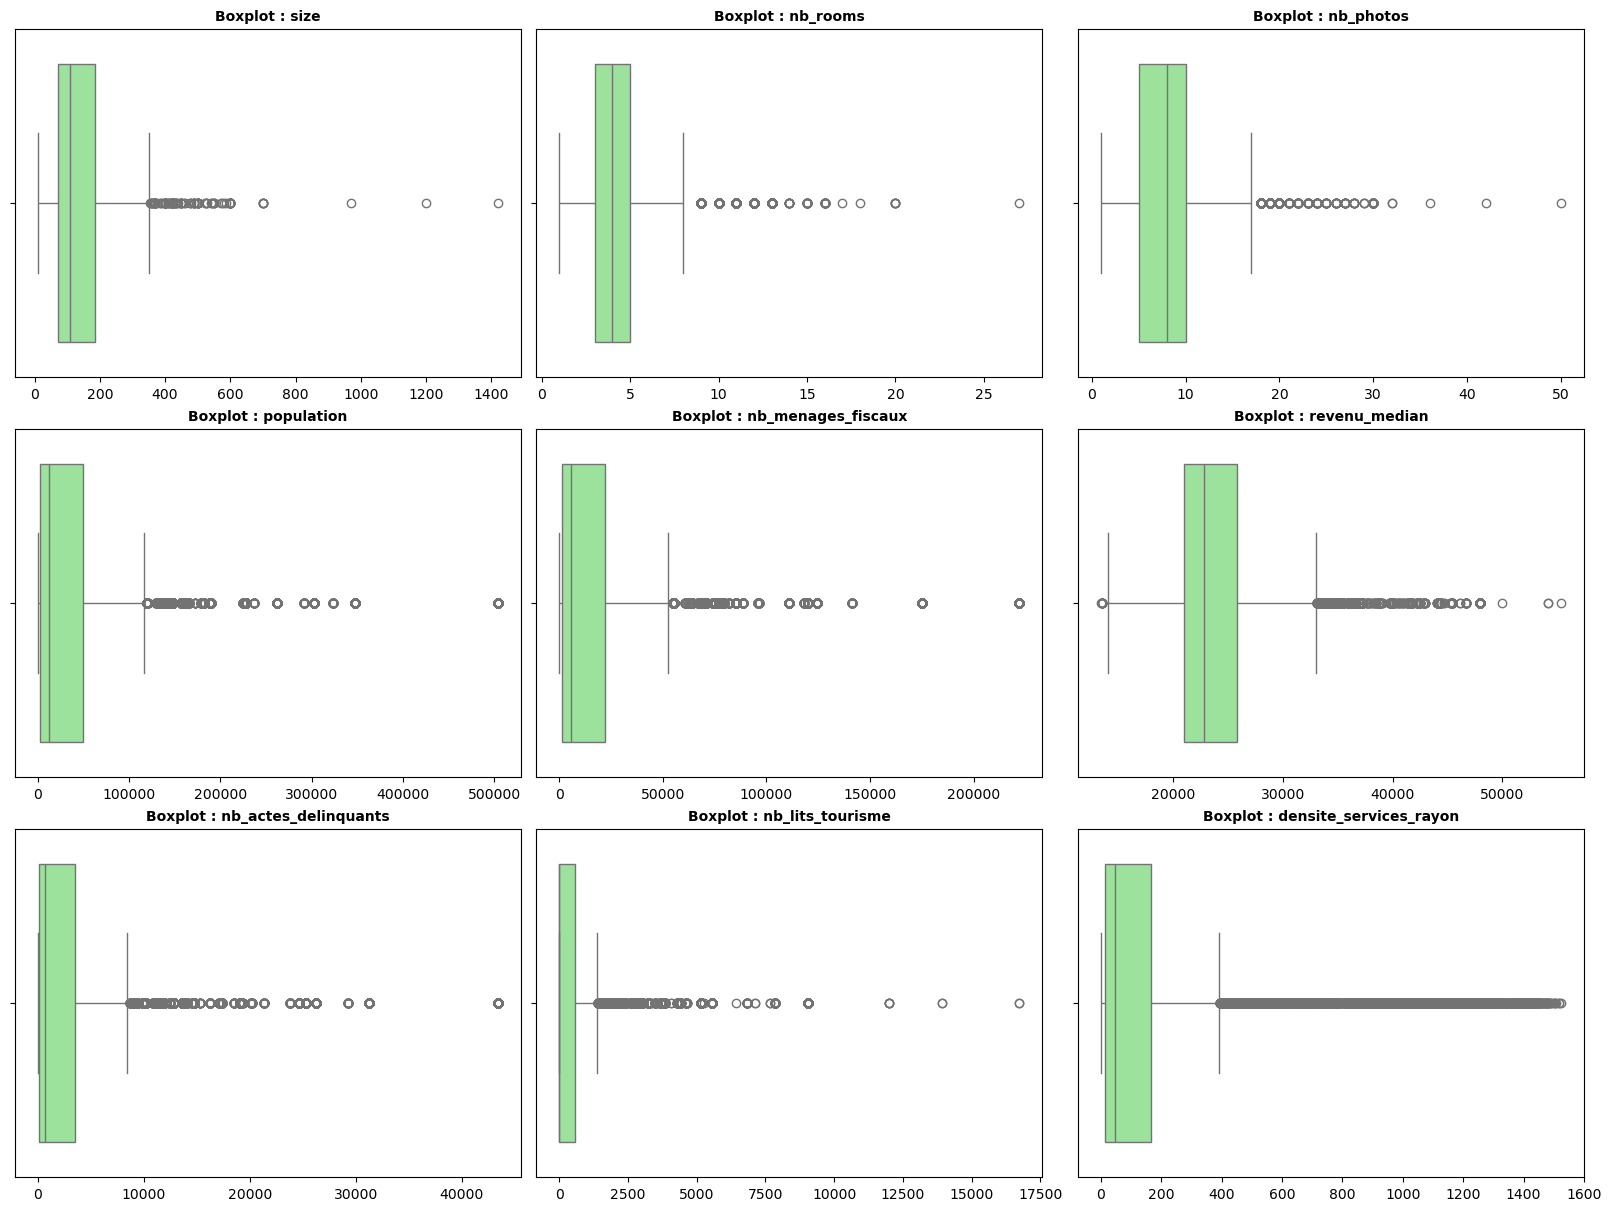

In [23]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon"]

plot_boxplots_grid(
    data_housing,
    variables_interet
)

**Cartographie - Répartition géographique des prix immobiliers**

In [24]:
carte_interactive(
    df = data_housing,
    hue = "target",
    lat_col = "approximate_latitude",
    lon_col = "approximate_longitude",
    variable_info = "target",
    titre = "Répartition géographique des prix immobiliers"
)

⚠️ Dataset volumineux : affichage d'un échantillon de 20000 points.
Variable 'target' convertie en catégories pour l'affichage couleur.


In [25]:
carte_interactive(
    data_housing,
    "property_type",
    "approximate_latitude",
    "approximate_longitude",
    "target",
    "Répartition géographique des types de propriété"
)

⚠️ Dataset volumineux : affichage d'un échantillon de 20000 points.


# Analyse bivariée

**Matrice de corrélation pour les variables d'interet**

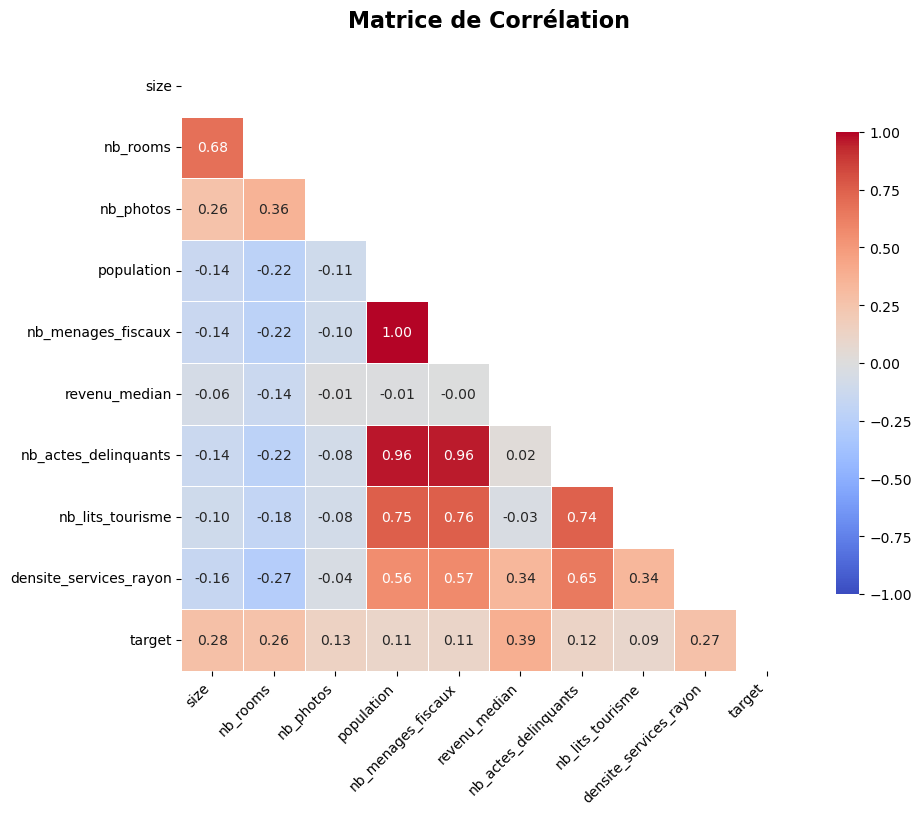

In [26]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon",
                     "target"]

afficher_heatmap_correlation(
    data_housing,
    variables_interet
)

**Analyse de la distribution des variables continues d'interet en fonction de la variable cible**

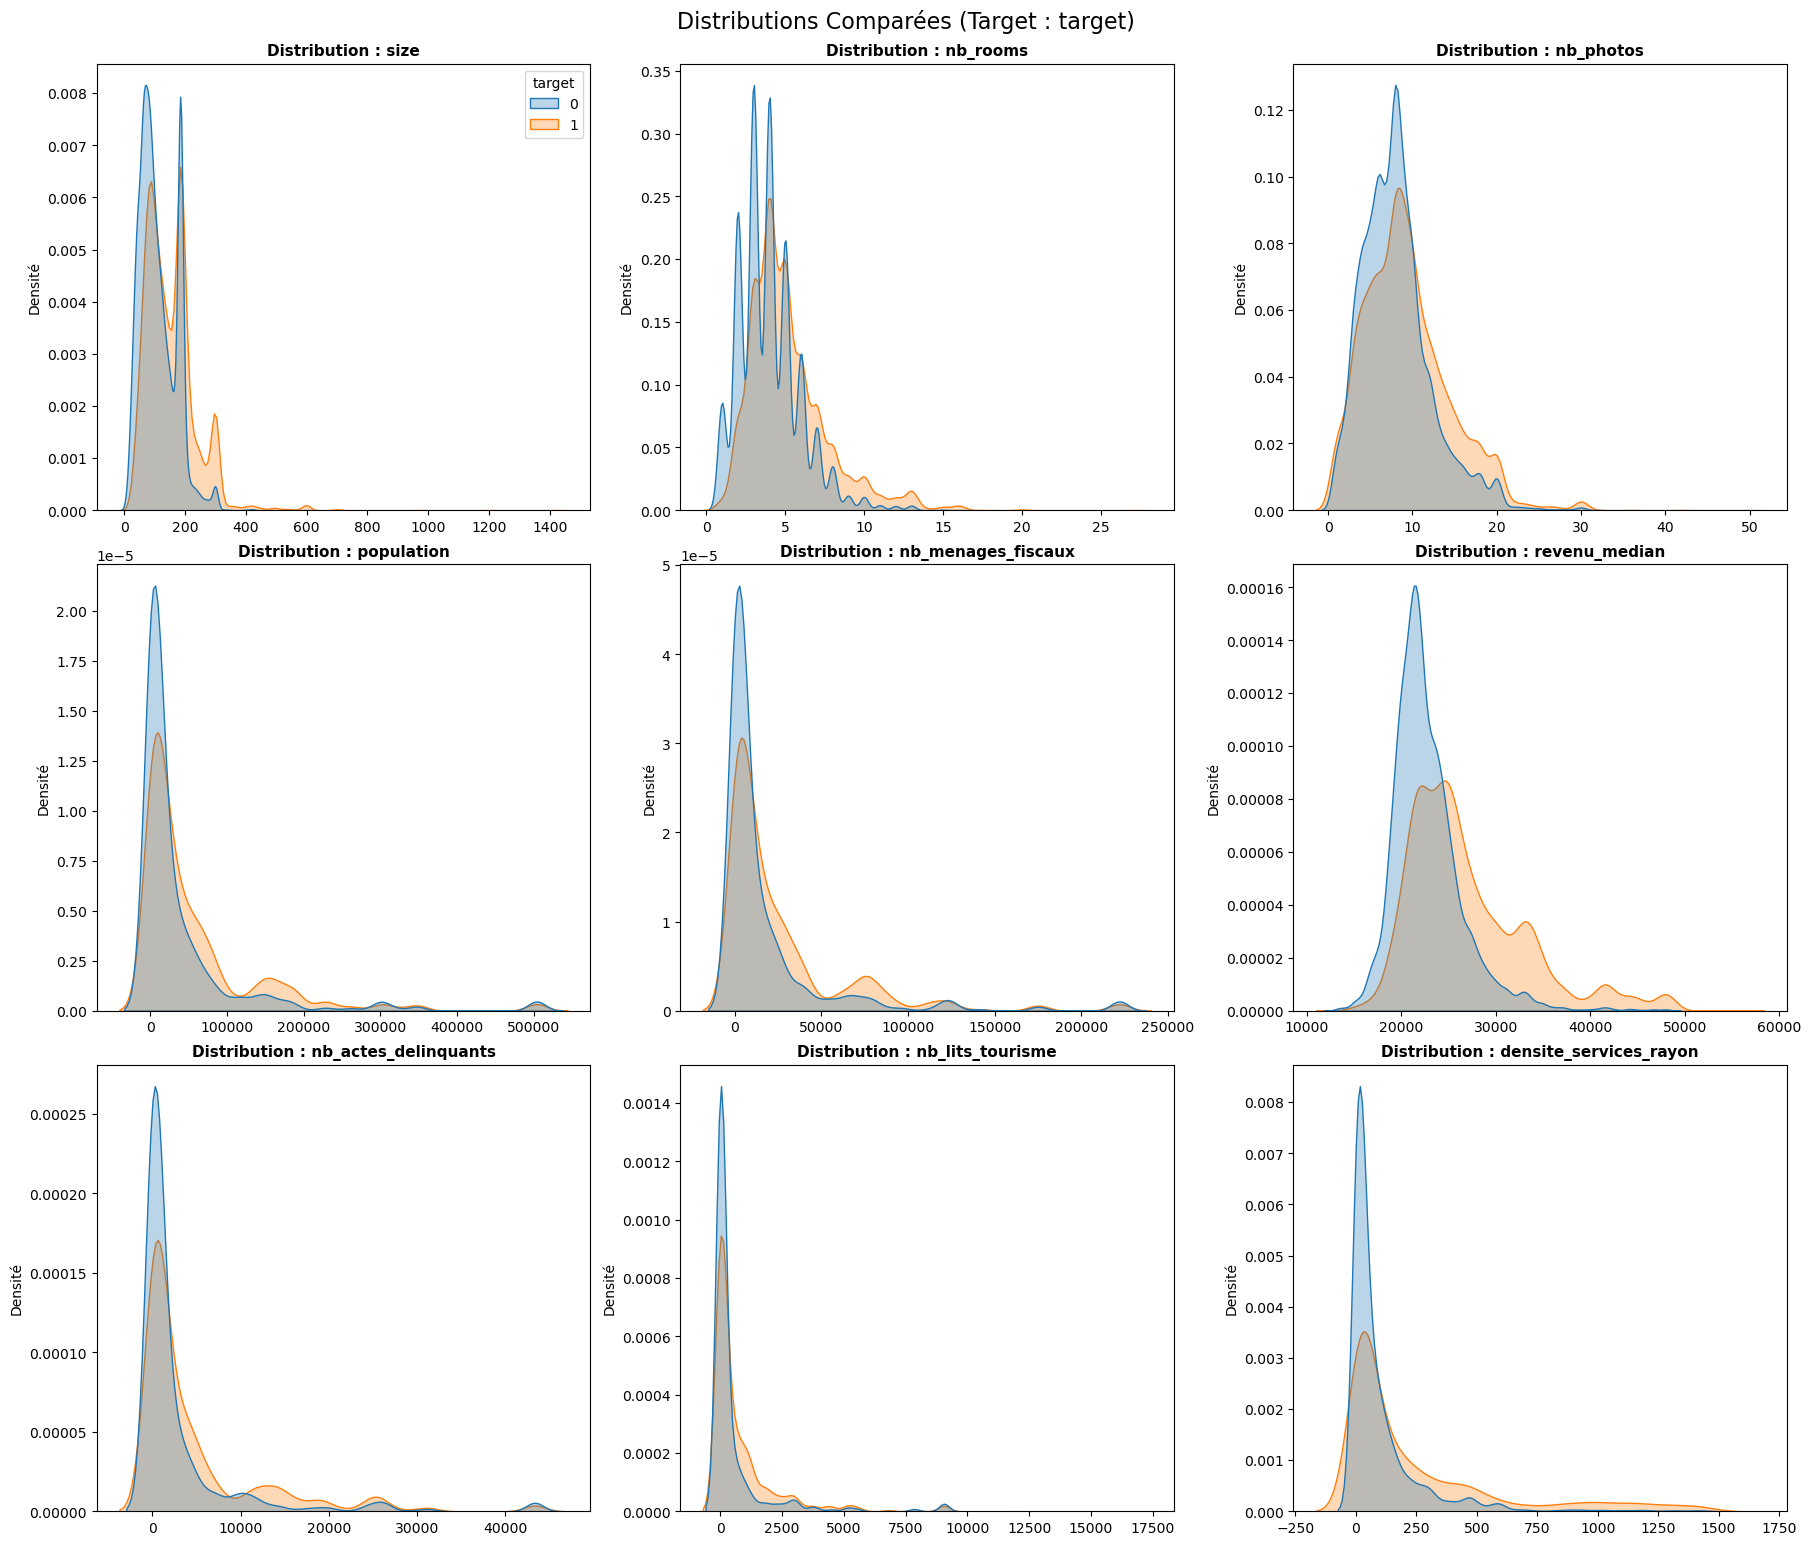

In [27]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon"]

plot_kde_multivariables_grid(
    data_housing,
    variables_interet,
    "target"
)

**Test de Mann-Whitney**

In [28]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon"]

analyser_dependance_mannwhitney(
    data_housing,
    "target",
    variables_interet
)

--- Analyse Mann-Whitney (Target Binaire : 'target') ---
--- Comparaison : Groupe '0' vs Groupe '1' ---


Variable  P-value Différence Significative  Taille Effet (r)  \
0           revenu_median  < 0.001                      OUI            0.4540   
1                    size  < 0.001                      OUI            0.3177   
2                nb_rooms  < 0.001                      OUI            0.2959   
3  densite_services_rayon  < 0.001                      OUI            0.2890   
4    nb_actes_delinquants  < 0.001                      OUI            0.2629   
5      nb_menages_fiscaux  < 0.001                      OUI            0.2561   
6              population  < 0.001                      OUI            0.2559   
7        nb_lits_tourisme  < 0.001                      OUI            0.2149   
8               nb_photos  < 0.001                      OUI            0.1432   

  Direction Effet      U Stat  
0         Positif  42892203.0  
1         Positif  54204306.5  
2         Positif  55972570.0  
3         Positif  57134340.0  
4         Positif  58298724.0  
5         Positif  58431481.0  
6         Positif  58936890.0  
7         Positif  62097451.5  
8         Positif  68851167.5

**Comptage variables catégorielles d'interet en fonction de la variable cible**

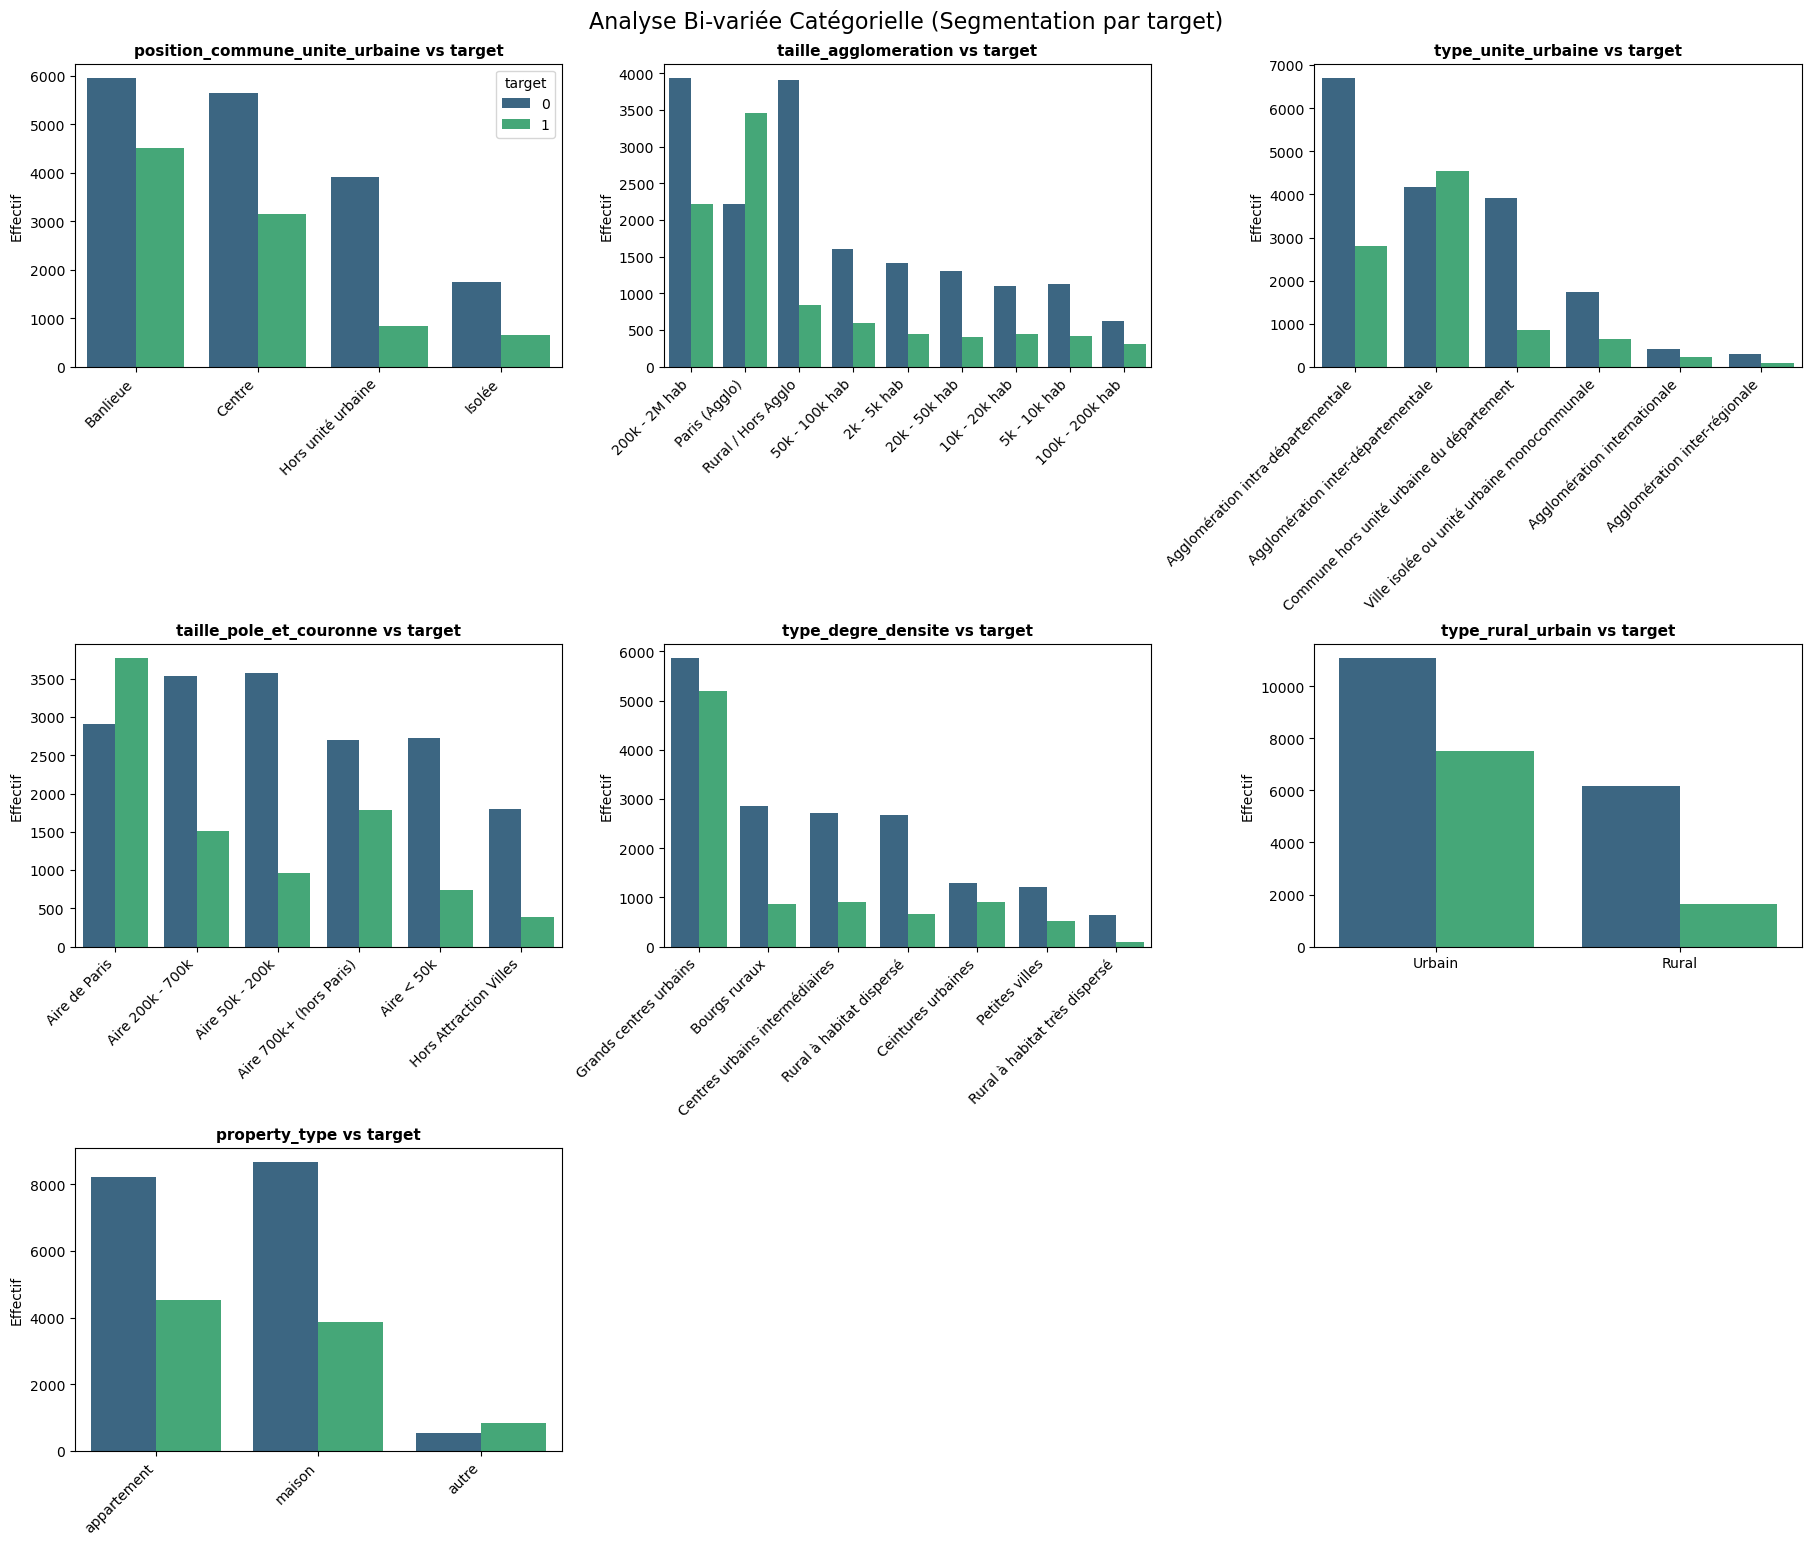

In [29]:
variables_interet = ["position_commune_unite_urbaine","taille_agglomeration","type_unite_urbaine",
                     "taille_pole_et_couronne","type_degre_densite","type_rural_urbain","property_type"]

plot_countplots_bivarie_grid(
    data_housing,
    "target",
    variables_interet
)

**Test de Khi2**

In [30]:
variables_interet = ["position_commune_unite_urbaine","taille_agglomeration","type_unite_urbaine",
                     "taille_pole_et_couronne","type_degre_densite","type_rural_urbain","property_type"]

analyser_dependance_khi2(
    data_housing,
    "target",
    variables_interet
    )

--- Analyse de dépendance (Khi-deux) avec la cible : 'target' ---


Variable  P-value Dépendance Significative  \
0            taille_agglomeration  < 0.001                      OUI   
1         taille_pole_et_couronne  < 0.001                      OUI   
2              type_unite_urbaine  < 0.001                      OUI   
3              type_degre_densite  < 0.001                      OUI   
4  position_commune_unite_urbaine  < 0.001                      OUI   
5               type_rural_urbain  < 0.001                      OUI   
6                   property_type  < 0.001                      OUI   

   V de Cramer  Chi2 Stat  
0       0.3154    2628.36  
1       0.3020    2410.15  
2       0.2718    1951.62  
3       0.2477    1620.91  
4       0.1929     983.11  
5       0.1864     917.60  
6       0.1356     490.01

# Note explicative du notebook

Cette seconde phase d’analyse exploratoire intervient après le nettoyage post-EDA afin de valider les corrections apportées et d’affiner la compréhension des relations entre variables et cible.

### Objectifs

- Vérifier l’impact du nettoyage sur les distributions (`size`, `nb_rooms`, etc.).
- Contrôler la cohérence des nouvelles modalités (ex : `property_type` regroupé).
- Réévaluer les relations statistiques avec la variable cible.
- Identifier d’éventuelles transformations supplémentaires avant l’économétrie.

### Principaux constats

- Les distributions des variables numériques sont plus stables et moins influencées par des valeurs extrêmes.
- La réduction des modalités améliore la lisibilité des analyses bivariées.
- Certaines variables territoriales et structurelles confirment leur rôle explicatif.
- Les corrélations restent modérées, suggérant une complémentarité des variables plutôt qu’une redondance forte.

### Implications pour la suite

Cette EDA consolidée permet :
- de sécuriser les hypothèses avant l’analyse économétrique,
- de confirmer la pertinence des variables retenues,
- d’orienter les spécifications du modèle (sélection, interactions éventuelles).

Elle constitue la dernière étape exploratoire avant la phase d’analyse économétrique et de modélisation.
